In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# os level dependencies
import os

In [5]:
data_dir = "./cleaned_data/"

In [8]:
os.listdir(data_dir)

['y_val.csv',
 'X_train.csv',
 'X_val.csv',
 'y_train.csv',
 'y_test.csv',
 'X_test.csv']

In [13]:
# building data distribution dictionary
data_distributions = {}
for file_name in os.listdir(data_dir):
    name = file_name.split(".")[0]
    print(f"- reading {file_name}")
    data_distributions[name] = pd.read_csv(os.path.join(data_dir, file_name))
    
print("done!")

- reading y_val.csv
- reading X_train.csv
- reading X_val.csv
- reading y_train.csv
- reading y_test.csv
- reading X_test.csv
done!


In [17]:
# there's unnamed: 0 column for every dataframe, removing it is the first step

In [29]:
for name, df in data_distributions.items():
    try:
        # if exists remove
        data_distributions[name] = df.drop('Unnamed: 0',axis=1)
    except:
        data_distributions[name] = df
    
print("Done!")

Done!


In [32]:
data_distributions.keys()

dict_keys(['y_val', 'X_train', 'X_val', 'y_train', 'y_test', 'X_test'])

In [55]:
x_train = data_distributions['X_train']
y_train = data_distributions['y_train']
x_test = data_distributions['X_test']
y_test = data_distributions['y_test']
x_val = data_distributions['X_val']
y_val = data_distributions['y_val']

### Models

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Handling - Object Columns  

In [47]:
object_columns = x_train.select_dtypes(include=['object'])
print(object_columns.head())
for column in object_columns.columns:
    print(f"Column: {column}")
    print(object_columns[column].unique())
    print()# Find object columns
object_columns = X_train.select_dtypes(include=['object'])

# Store object columns as a separate DataFrame
object_df = X_train[object_columns.columns]

# Remove object columns from X_train
X_train = X_train.drop(columns=object_columns.columns)

# Display the first few rows of the object DataFrame
print("Object DataFrame:")
print(object_df.head())

# Display the first few rows of X_train after removal of object columns
print("\nX_train after removal of object columns:")
print(X_train.head())

   Industry_Sector                       Industry_Sub_Sector     Risk_Group
0  Wholesale Trade    Merchant Wholesalers, Nondurable Goods  Standard Risk
1     Retail Trade  Clothing and Clothing Accessories Stores  Standard Risk
2     Construction               Specialty Trade Contractors  Standard Risk
3     Construction               Specialty Trade Contractors  Standard Risk
4     Retail Trade  Clothing and Clothing Accessories Stores  Standard Risk
Column: Industry_Sector
['Wholesale Trade' 'Retail Trade' 'Construction' 'Manufacturing'
 'Professional, Scientific, and Technical Services'
 'Accommodation and Food Services' 'Educational Services'
 'Administrative and Support and Waste Management and Remediation Services'
 'Transportation and Warehousing' 'Health Care and Social Assistance'
 'Other Services (except Public Administration)'
 'Arts, Entertainment, and Recreation' 'Finance and Insurance'
 'Real Estate and Rental and Leasing' 'Utilities'
 'Mining, Quarrying, and Oil and Gas 

### Random Forest with GridSearch
--
Do not run this, takes a lot of computational time

In [52]:


# rf = RandomForestRegressor()

# # Leveraging GridSearchCV to Achieve a FineTuned Model
# parameters = {
#     'n_estimators': [100, 200, 300],
#     "max_depth": [None, 10, 20, 30],
#     "min_samples_split": [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Perform grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=5, scoring="neg_mean_squared_error")
# grid_search.fit(x_train, y_train)

# # get best parameters and best score
# best_params = grid_search.best_params_
# best_score = np.sqrt(-grid_search.best_score_)

# print("Best Parameters:",best_params)
# print("Best RMSE: ", best_score)

/Users/rohan/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rohan/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rohan/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/rohan/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

KeyboardInterrupt: 

In [57]:
# Define the model
rf = RandomForestRegressor(n_estimators=100, 
                           max_depth=None, 
                           min_samples_split=2, 
                           min_samples_leaf=1)

# Train the model
rf.fit(x_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")

# Make predictions
predictions = rf.predict(x_test)

/Users/rohan/miniconda3/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature Importances:
Feature 1: 0.0009743710018048046
Feature 2: 0.0007536909558613638
Feature 3: 0.9978382543819949
Feature 4: 1.4532926873839675e-05
Feature 5: 8.246482191071235e-06
Feature 6: 2.2494831392859335e-06
Feature 7: 3.474770775176278e-06
Feature 8: 4.519717438141037e-06
Feature 9: 5.95581247221733e-06
Feature 10: 6.114112858142883e-06
Feature 11: 1.7630992452897683e-06
Feature 12: 1.663170781769657e-05
Feature 13: 1.836408384581587e-05
Feature 14: 1.4431988128738654e-05
Feature 15: 1.2265125376965712e-06
Feature 16: 8.293542059688671e-06
Feature 17: 5.560842027355773e-06
Feature 18: 1.9870704362487537e-05
Feature 19: 1.6629885525294106e-05
Feature 20: 1.5900595924732544e-05
Feature 21: 1.2169266532584218e-05
Feature 22: 1.5078271247338693e-05
Feature 23: 1.5027334829059251e-05
Feature 24: 1.5096829315736092e-05
Feature 25: 1.4370892567493575e-05
Feature 26: 1.4379321719624227e-05
Feature 27: 1.5893478136563554e-05
Feature 28: 1.1588580138528962e-05
Feature 29: 1.6438158109

In [63]:
feature_importances_rf = {}
for col, importance in zip(x_train.columns, feature_importances):
    print(f" {col}: {importance}")
    feature_importances_rf[col] = importance

 probability_of_default: 0.0009743710018048046
 loss_given_default: 0.0007536909558613638
 lumos_score: 0.9978382543819949
 empoyessexistingqty: 1.4532926873839675e-05
 2017_naics: 8.246482191071235e-06
 naics_1: 2.2494831392859335e-06
 naics_2: 3.474770775176278e-06
 naics_3: 4.519717438141037e-06
 naics_4: 5.95581247221733e-06
 naics_5: 6.114112858142883e-06
 borr_count: 1.7630992452897683e-06
 loan_max_fico: 1.663170781769657e-05
 loan_min_fico: 1.836408384581587e-05
 loan_mean_fico: 1.4431988128738654e-05
 collateral: 1.2265125376965712e-06
 collateral_amount: 8.293542059688671e-06
 loan_size: 5.560842027355773e-06
 business_revenue: 1.9870704362487537e-05
 current_inflation_rate: 1.6629885525294106e-05
 expected_12mth_inflation_rate: 1.5900595924732544e-05
 fed_funds: 1.2169266532584218e-05
 t10yie: 1.5078271247338693e-05
 vix: 1.5027334829059251e-05
 vix_change: 1.5096829315736092e-05
 avg_hourly_earnings: 1.4370892567493575e-05
 t10y2y: 1.4379321719624227e-05
 county_unemploymen

In [70]:
fi_rf = pd.DataFrame(pd.Series(feature_importances_rf, name='importances')).reset_index()
fi_rf.sort_values(by='importances', ascending=False)

,index,importances
2,lumos_score,9.978383e-01
0,probability_of_default,9.743710e-04
1,loss_given_default,7.536910e-04
36,state_labor_force_participation_rate,2.221630e-05
17,business_revenue,1.987070e-05
...,...,...
90,borrstate_WY,8.322878e-10
80,borrstate_SD,7.351200e-10
66,borrstate_ND,6.482067e-10
48,borrstate_GU,6.473089e-10


In [87]:
fi_rf.sort_values(by='importances', ascending=False).head(10)

,index,importances
2,lumos_score,0.997838
0,probability_of_default,0.000974
1,loss_given_default,0.000754
36,state_labor_force_participation_rate,0.000022
17,business_revenue,0.000020
12,loan_min_fico,0.000018
35,state_employment_pop_ratio,0.000018
11,loan_max_fico,0.000017
18,current_inflation_rate,0.000017
28,county_unemployment,0.000016


In [73]:
predictions_val = rf.predict(x_val)
predictions_val

array([1.5013, 3.0095, 0.8509, ..., 1.1381, 7.9194, 1.1868])

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on validation data
predictions_val = rf.predict(x_val)

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, predictions_val)
mse = mean_squared_error(y_val, predictions_val)
r2 = r2_score(y_val, predictions_val)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.022732204999999988
Mean Squared Error: 0.006916543496500012
R-squared: 0.9993210788913165


###  The model's performance on the validation set is impressive, boasting a remarkably low mean absolute error (MAE) of 0.0227 and mean squared error (MSE) of 0.00692. Moreover, the high R-squared value of 0.9993 signals a robust fit of the model to the data, indicating it effectively captures nearly all variability in the target variable.

In [75]:

# Make predictions on test data
predictions_test = rf.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions_test)
mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_val, predictions_test)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 0.022418549999999978
Mean Squared Error: 0.004415883194000005
R-squared: -0.9488977740482971


### The test data analysis reveals a notable mean absolute error (MAE) of 0.0224 and a moderate mean squared error (MSE) of 0.00442, implying generally accurate predictions. However, the negative R-squared value of -0.9489 signifies a subpar fit of the model to the test data, hinting at potential overfitting or challenges with model generalization. Further examination of model complexity and data attributes is advised.

### K-Nearest Neighbours Regressor

<Axes: >

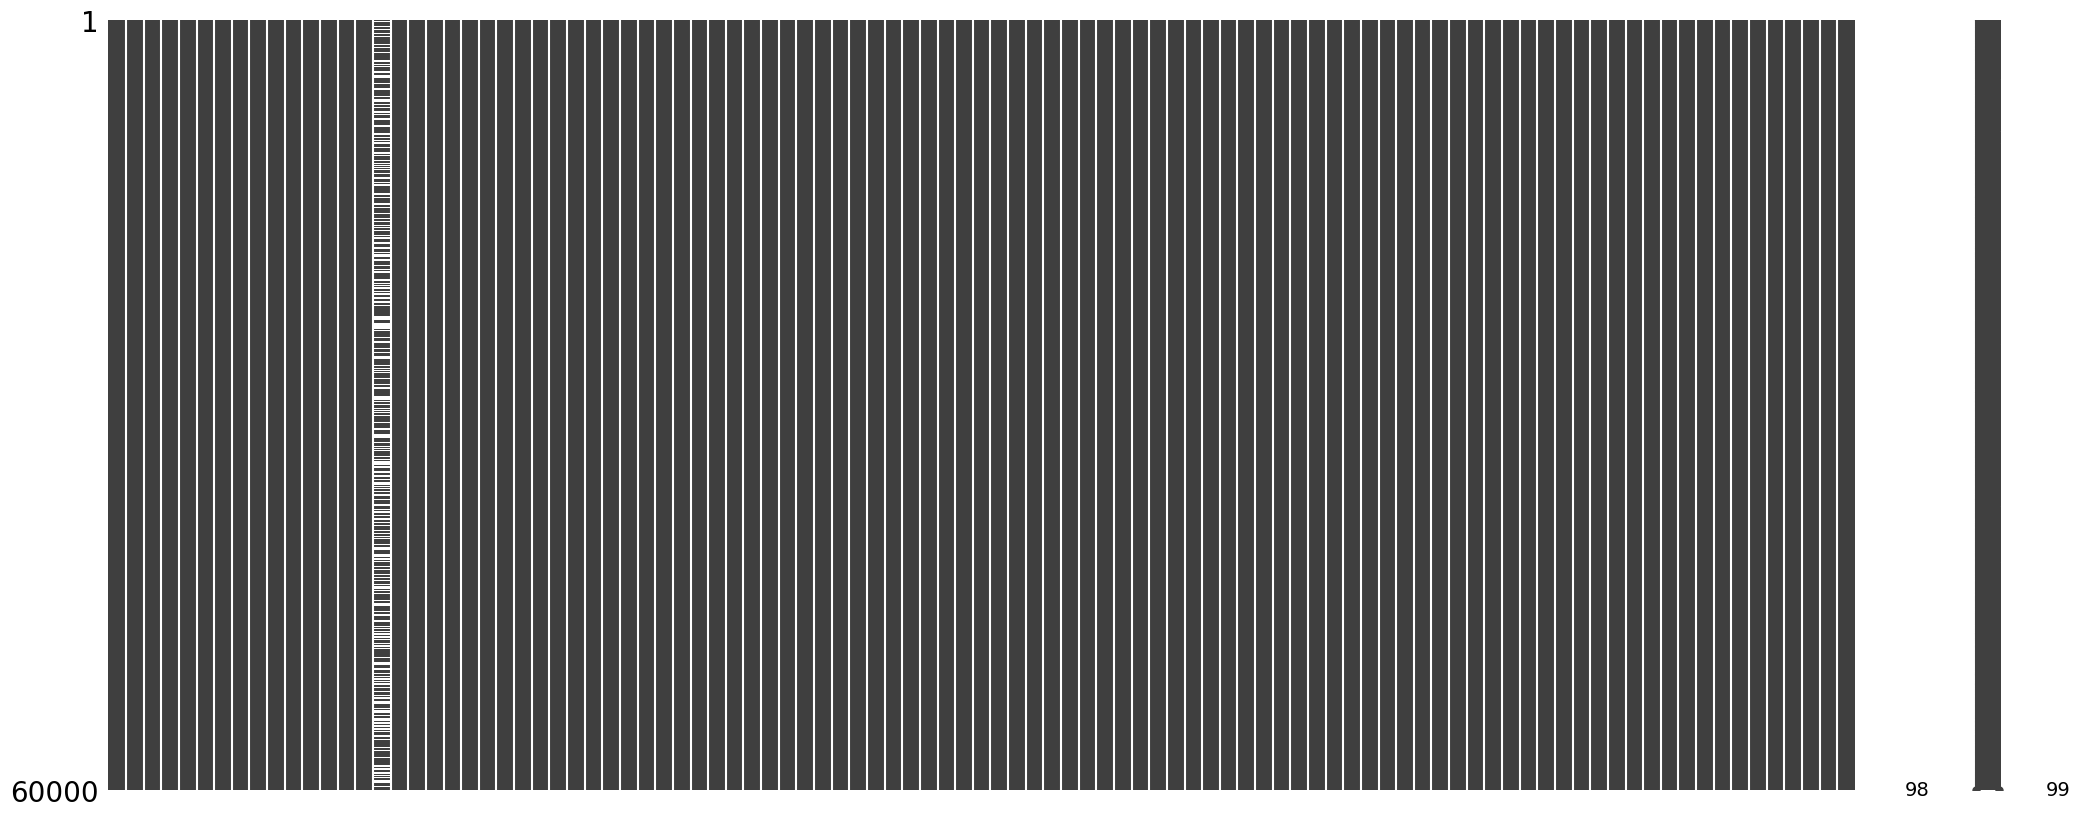

In [78]:
import missingno as msno
msno.matrix(x_train)

In [83]:
x_train_no_na = x_train.dropna(axis=1)
x_val_no_na = x_val.dropna(axis=1)

In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
knn.fit(x_train_no_na, y_train)

KNeighborsRegressor()

<Axes: >

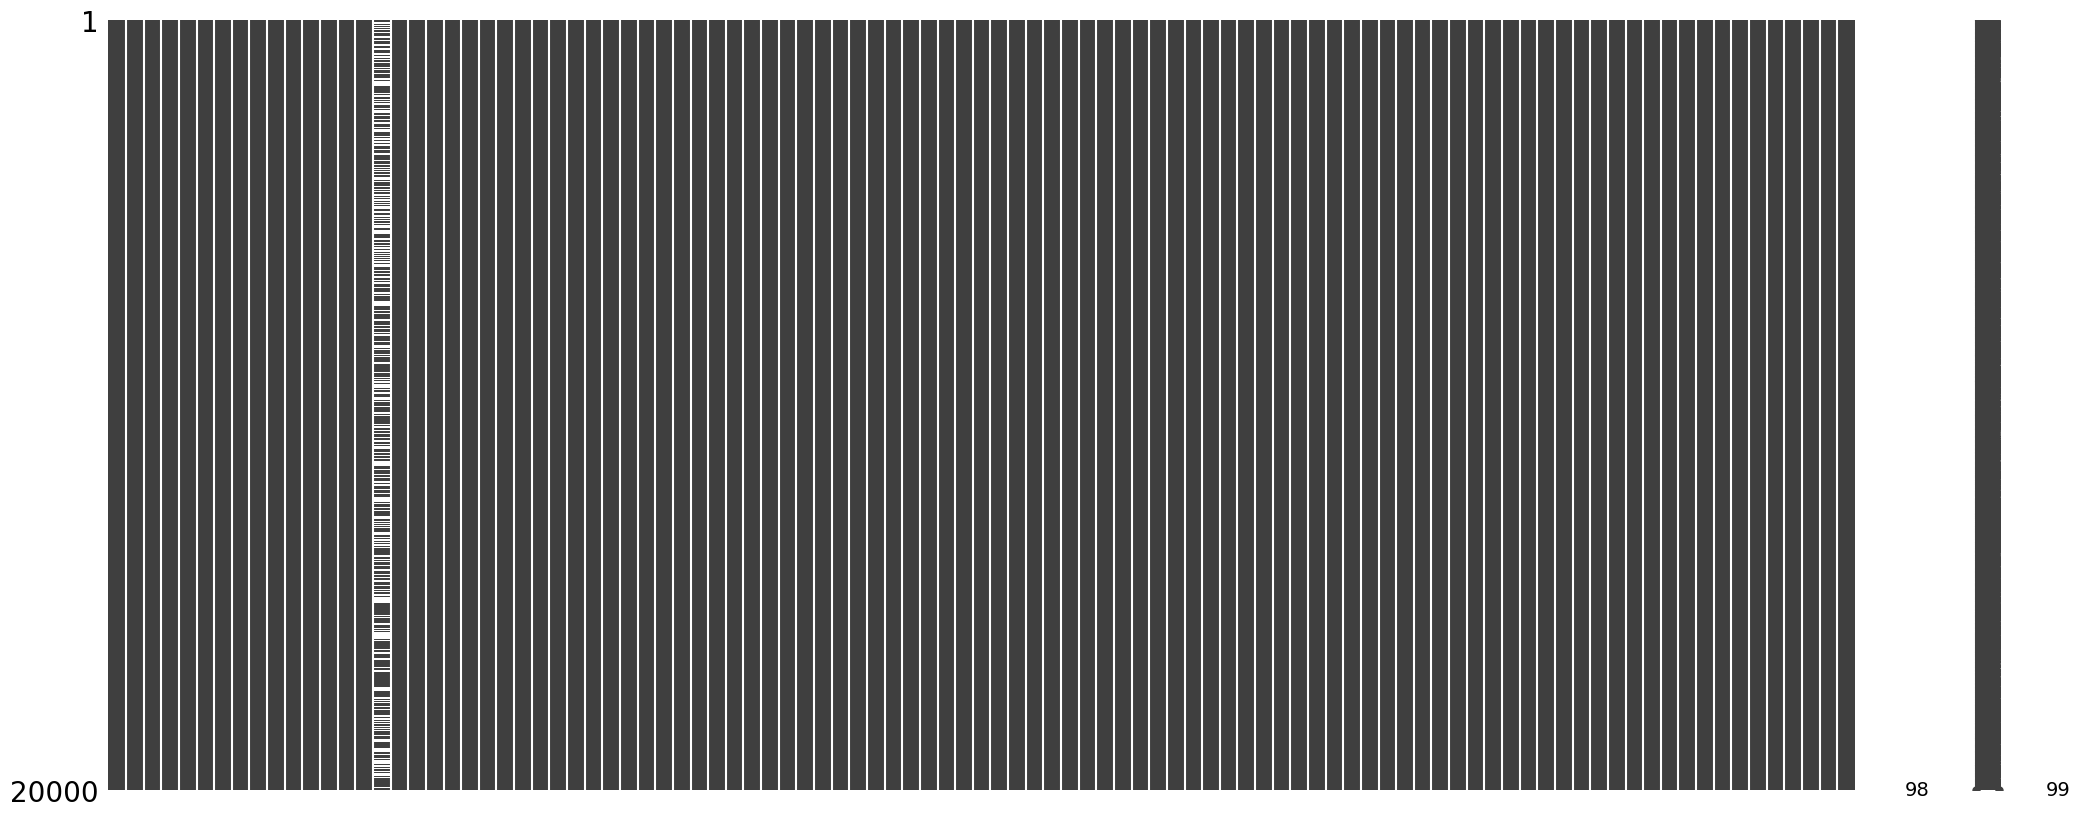

In [84]:
# Make predictions on test data
predictions_test = knn.predict(x_val_no_na)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions_test)
mse = mean_squared_error(y_test, predictions_test)
r2 = r2_score(y_test, predictions_test)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 2.5812913
Mean Squared Error: 15.295471526999998
R-squared: -0.5498128748238655


### Elbow Method

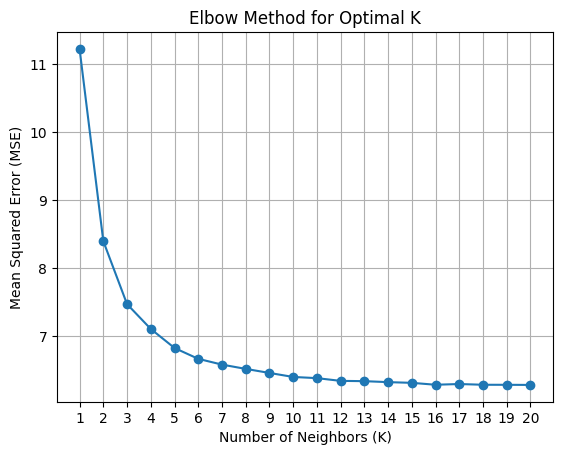

In [86]:
# Define a range of k values
k_values = range(1, 21)

# Initialize lists to store mean squared errors for each k
mse_values = []

# Iterate over each k value
for k in k_values:
    # Initialize the KNN regressor with current k
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Train the model
    knn.fit(x_train_no_na, y_train)
    
    # Make predictions on validation data
    predictions_val = knn.predict(x_val_no_na)
    
    # Calculate mean squared error
    mse = mean_squared_error(y_val, predictions_val)
    
    # Append to list of mse values
    mse_values.append(mse)

# Plot the elbow curve
plt.plot(k_values, mse_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()